<a href="https://colab.research.google.com/github/shakil1819/CSE442-Machine-Learning-Sessional/blob/main/week_3_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd

# Read the dataset into a Pandas DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/shakil1819/CSE442-Machine-Learning-Sessional/main/week%203%20-4/Advertising.csv')

# Print the first few rows of the DataFrame
print(data.head())

# Get descriptive statistics of the DataFrame
print(data.describe())

# Print information about the DataFrame
print(data.info())


      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   s

### 1.7.3 Import Libraries in Google Colab

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

### 1.7.5 Plotting the data for understanding

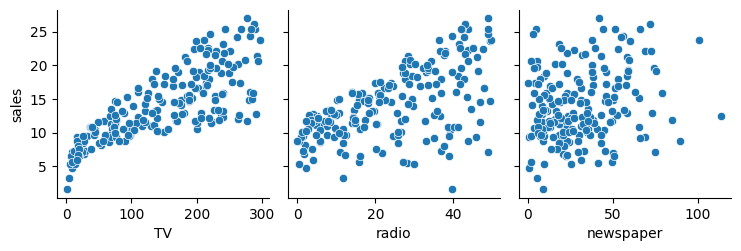

In [35]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',kind='scatter')
plt.show()

### 1.7.6 Plotting the data in different fashion

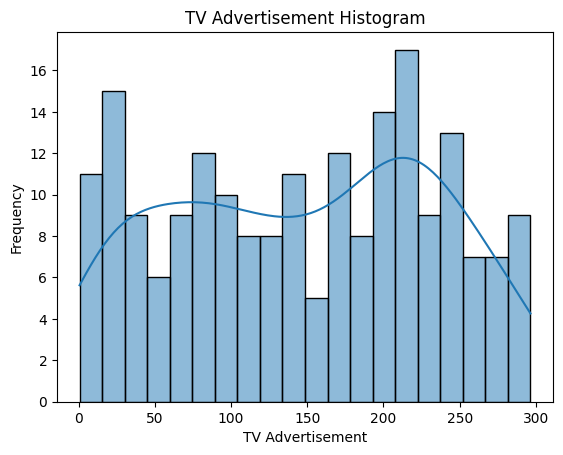

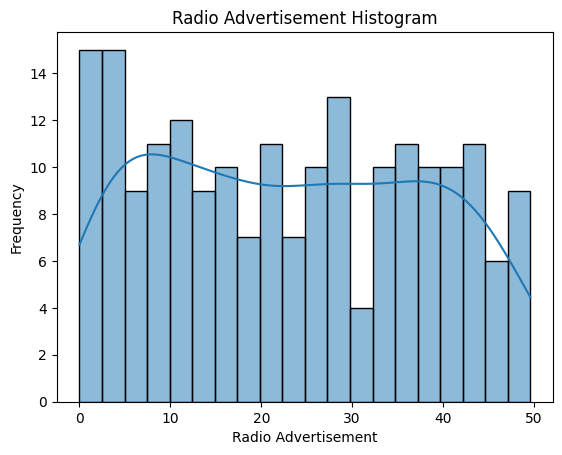

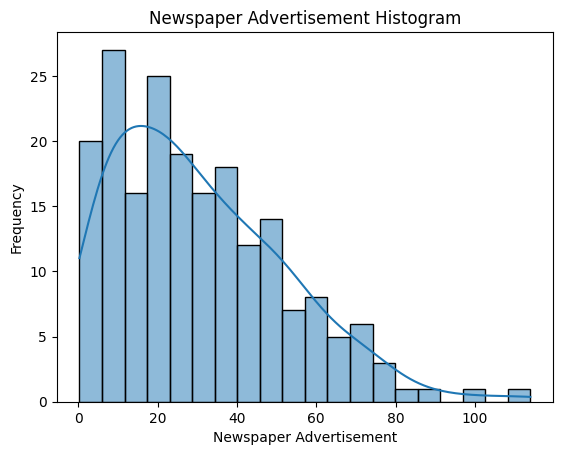

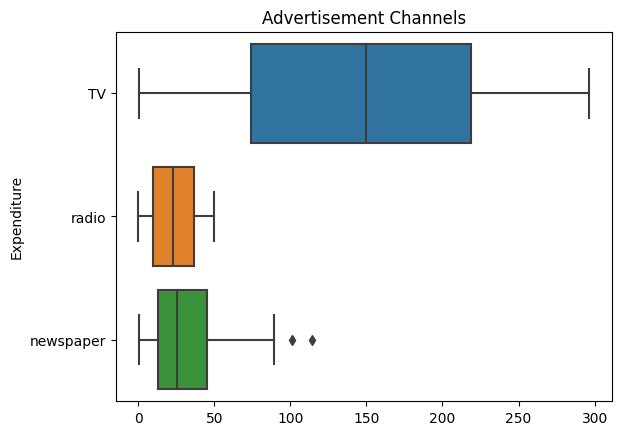

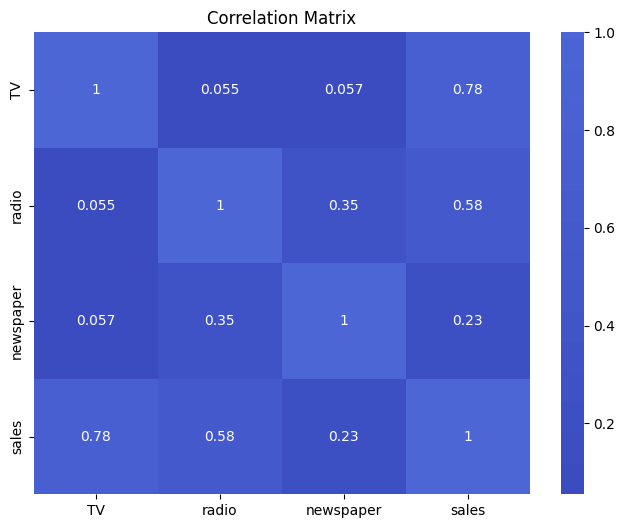

In [36]:
# Histograms
sns.histplot(data=data, x="TV", bins=20, kde=True)
plt.title('TV Advertisement Histogram')
plt.xlabel('TV Advertisement')
plt.ylabel('Frequency')
plt.show()

# Histogram of radio advertisement
sns.histplot(data=data, x='radio', bins=20, kde=True)
plt.title('Radio Advertisement Histogram')
plt.xlabel('Radio Advertisement')
plt.ylabel('Frequency')
plt.show()

# Histogram of newspaper advertisement
sns.histplot(data=data, x='newspaper', bins=20, kde=True)
plt.title('Newspaper Advertisement Histogram')
plt.xlabel('Newspaper Advertisement')
plt.ylabel('Frequency')
plt.show()

# Box plots of advertising channels
sns.boxplot(data=data[['TV', 'radio', 'newspaper']], orient='horizontal')
plt.ylabel('Expenditure')
plt.title('Advertisement Channels')
plt.show()

# Correlation matrix
correlation_matrix = data[['TV', 'radio', 'newspaper', 'sales']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=8)
plt.title('Correlation Matrix')
plt.show()



## 1.7.7 Data Pre-processing

### 1.7.7.1 Checking the NULL values

In [37]:
null_counts = data.isnull().sum()
data_cleaned = data.dropna()
null_counts

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

### 1.7.7.2 Define dependent (target) and independent (predictor) features

In [38]:
# Create the independent variable
X = data_cleaned[['TV', 'radio', 'newspaper']]

# Create the dependent variable
y = data_cleaned['sales']

### 1.7.7.3 Splitting Train and Test data

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### 1.7.7.4 Feature Scaling for Multiple Linear Regression


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 1.7.8 Model Building and Training

### 1.7.8.1 Training the model

In [41]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

### 1.7.8.2 Predicting for Test Data

In [42]:
y_pred = model.predict(X_test_scaled)


## 1.7.9 Model Evaluation

### 1.7.9.1 Calculating Metrics


In [43]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE", mse)
print("R2", r2)

MSE 3.174097353976106
R2 0.8994380241009119


## 1.7.10 Visualizing Predictions


### 1.7.10.1 Visualize predicted vs. actual values

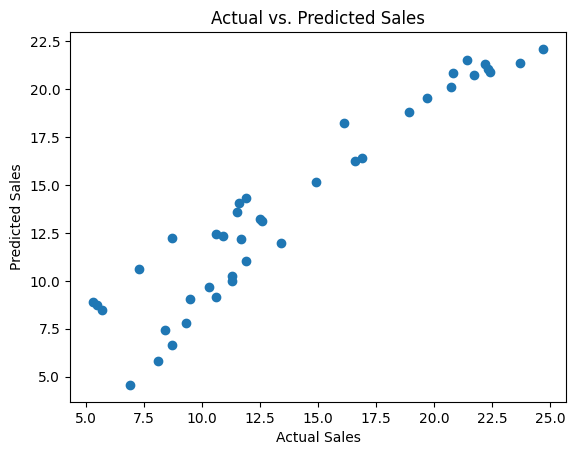

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()


### 1.7.10.2 Visualizing Residuals


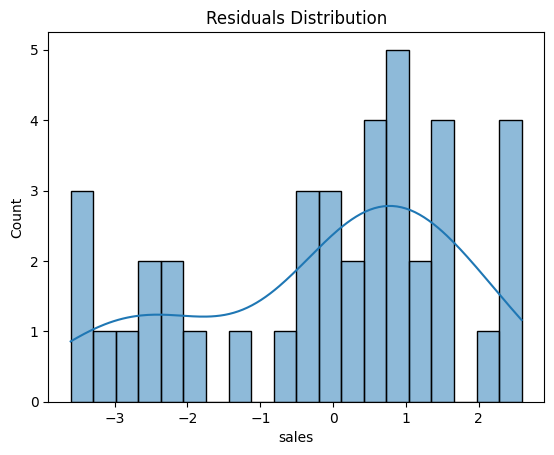

In [45]:
residuals = y_test - y_pred
sns.histplot(residuals, bins=20, kde=True)
plt.title('Residuals Distribution')
plt.show()

### 1.7.10.3 Visualizing Coefficients

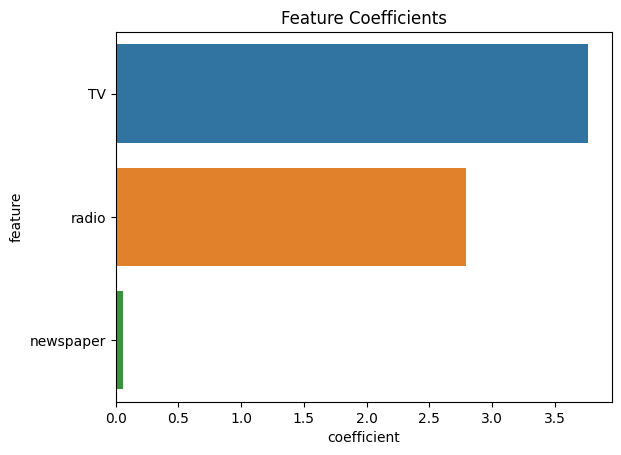

In [46]:
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
sns.barplot(x='coefficient', y='feature', data=coef_df)
plt.title('Feature Coefficients')
plt.show()